# Open boundary conditions which mimic an infinite domain in $\mathtt{DIVAnd}$

## General idea

Manipulate the metrics of the boxes surrounding an open sea such that the applied boundary condition is artifically pushed further away, similar to the idea of absorbing boundary conditions. Criteria for success: The analysis with data points in the center should not be different if the open boundary is 1 or 20 length scales away. 

Mathematical criteria (need to show it is close to the desired property from above): The background variance field should be as uniform as possible and not increase near the open boundary (as it currently does with the zero normal gradient condition).

### 1D testing

First tests reveal that a good way to adapt the metrics $p_m$ near the boundaries is to fix values such that $l p_m \sim 1$ where $l$ is the local length scale. This amount to move the last grid point two length scales away in terms of metrics used in the numerical finite differences. (Note that the value of $p_m$ mentionned is the metric assiciated with the distance between the last two grid points, not the metric associated with the last grid point; this is useful to control also the position of the coordinates for data locations).

For example, testing for different values of $\alpha$ to calculate $p_m$=  $1 \over \alpha  l $ we observe a clear minimum in the variance of $\mathrm{diag} (\mathbf{B})$. If we use this value and look at the analysis with the adapted boundary condition and the analysis in a much larger domain, the differences are indeed very small.





In [1]:
using DIVAnd
using JupyterFormatter
enable_autoformat()
DIVAnddir = pathof(DIVAnd);
exampledir = joinpath(dirname(DIVAnddir), "../examples/")
isdir(exampledir)

true

[ Info: Directory already exists
[ Info: Directory already exists
[ Info: Created figure ./figures/DIVAnd_optimizepmn1Db_reference.png
┌ Warning: Assignment to `s` in soft scope is ambiguous because a global variable by the same name exists: `s` will be treated as a new local. Disambiguate by using `local s` to suppress this warning or `global s` to assign to the existing global variable.
└ @ ~/.julia/packages/DIVAnd/4UymR/examples/DIVAnd_optimizepmn1Db.jl:79


argmin(vj) = 48
argmin(rj) = 33


[ Info: Created figure ./figures/DIVAnd_optimizepmn1Db_optimisation.png


alen = 0.73


[ Info: Created figure ./figures/DIVAnd_optimizepmn1Db_optimal1.png


alen = 0.5800000000000001


[ Info: Created figure ./figures/DIVAnd_optimizepmn1Db_optimal2.png


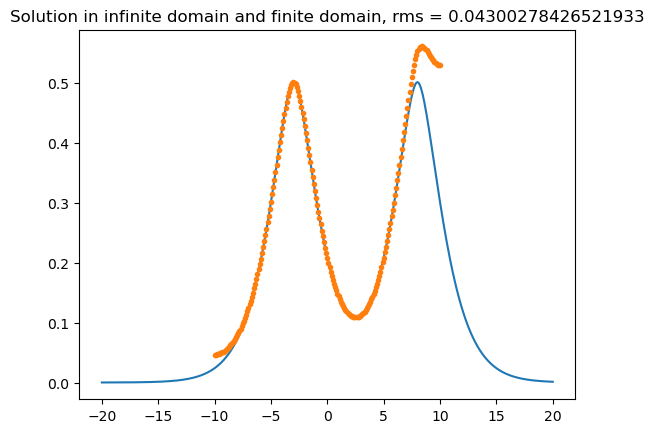

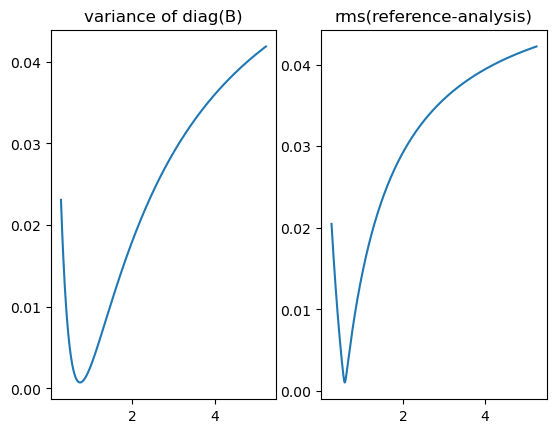

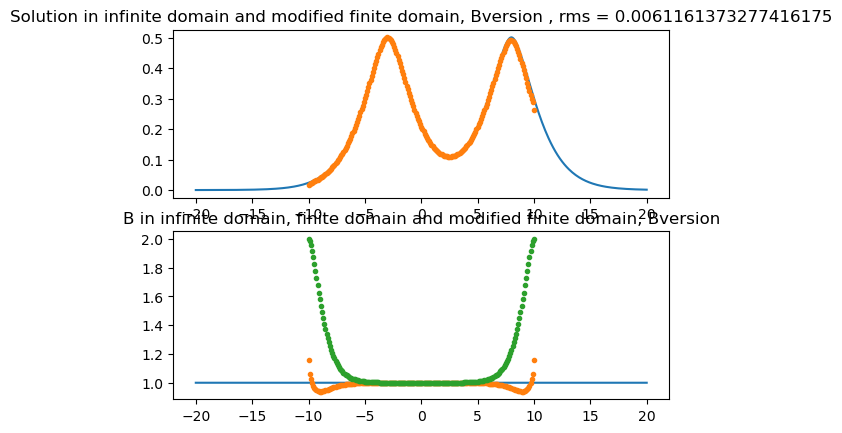

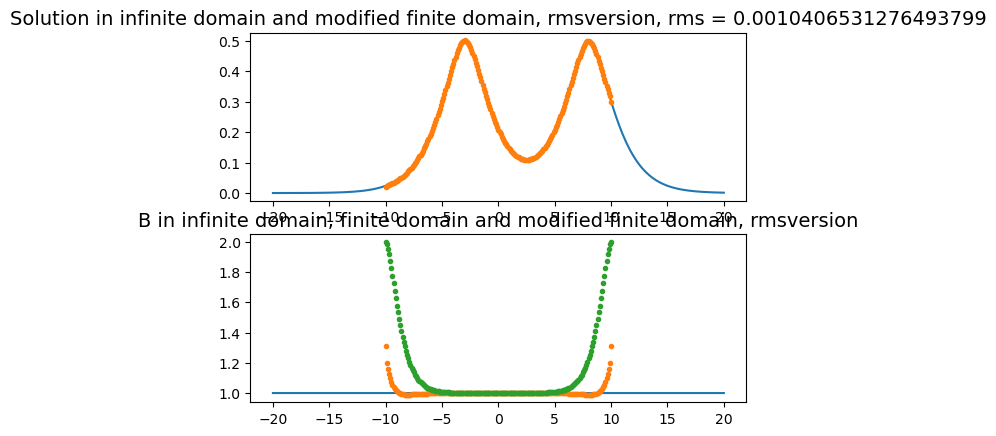

In [2]:
include(joinpath(exampledir, "DIVAnd_optimizepmn1Db.jl"))

In practise the exact value for $\alpha$ is depending on the domain size $L$ and grid resolution compared to the length scales $l$.

Optimal $ \alpha $ as  a function of $L \over l$ (domain size $L$ over length scale $l$)  and resolution $ l p_m$ (length scale $l$ over grid spacing $1/p_m$). The optimal valueof  $\alpha$ is used to force the last and first metric to be $p_m$=  $1 \over \alpha  l $  

[ Info: Directory already exists
[ Info: Directory already exists


lpmc[5] = 7.95

┌ Warning: Assignment to `len` in soft scope is ambiguous because a global variable by the same name exists: `len` will be treated as a new local. Disambiguate by using `local len` to suppress this warning or `global len` to assign to the existing global variable.
└ @ ~/.julia/packages/DIVAnd/4UymR/examples/DIVAnd_simple_example1poptimizepmn1D.jl:42
┌ Warning: Assignment to `xi` in soft scope is ambiguous because a global variable by the same name exists: `xi` will be treated as a new local. Disambiguate by using `local xi` to suppress this warning or `global xi` to assign to the existing global variable.
└ @ ~/.julia/packages/DIVAnd/4UymR/examples/DIVAnd_simple_example1poptimizepmn1D.jl:50
┌ Warning: Assignment to `mask` in soft scope is ambiguous because a global variable by the same name exists: `mask` will be treated as a new local. Disambiguate by using `local mask` to suppress this warning or `global mask` to assign to the existing global variable.
└ @ ~/.julia/packages/DIVAnd/4U


dsoverl[13] = 10.0
alpha[5, 13] = 0.84


[ Info: Saved figure as ./figures/DIVAnd_simple_example1poptimizepmn1D_varb.png
[ Info: Saved figure as ./figures/DIVAnd_simple_example1poptimizepmn1D_varr.png
[ Info: Saved figure as ./figures/DIVAnd_simple_example1poptimizepmn1D_alpha.png
[ Info: Saved figure as ./figures/DIVAnd_simple_example1poptimizepmn1D_varbc.png


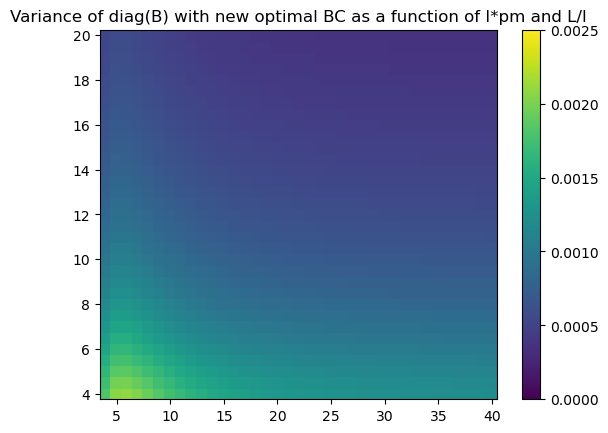

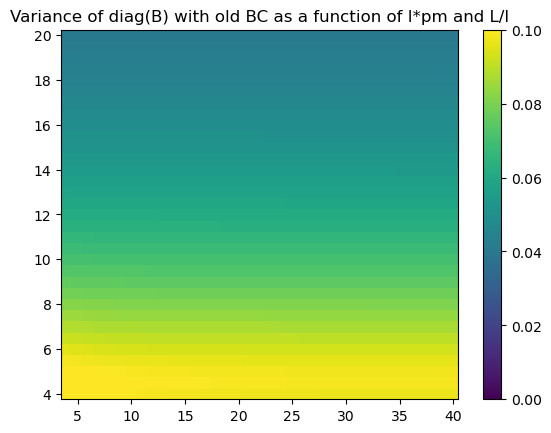

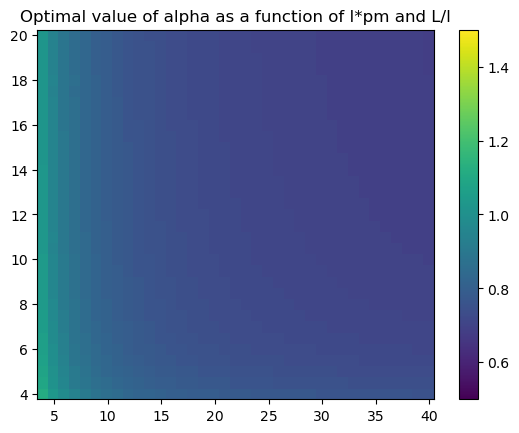

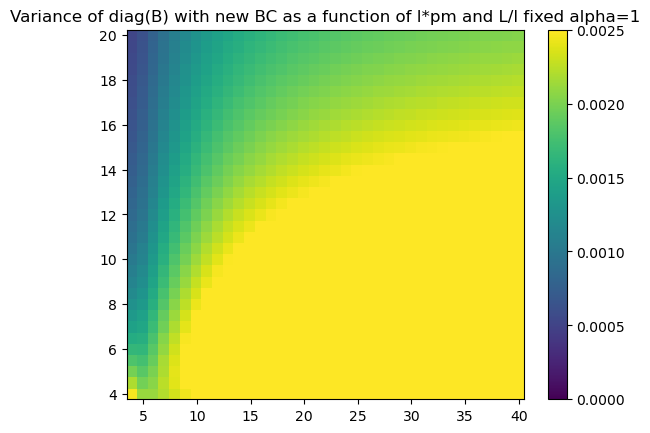

In [3]:
include(joinpath(exampledir, "DIVAnd_simple_example1poptimizepmn1D.jl"))

### 2D verification

Here we take values of $L \over l$ and $l p_m$ likely to arise in the windowing approach so as to minimize boundary effects during the windowing. Then we verify that the value of $\alpha$ from the 1D case is also adapted for the 2D case. For ${L \over l}\sim 10$ and $lp_m \sim 8$, the optimal value of $\alpha$ from the 1D case is $\alpha=1.09$

len = 0.2001250781738587

[ Info: Directory already exists
[ Info: Directory already exists



2 / len = 9.993749999999999
pm[1, 1] * len = 8.00500312695434
0.8996283006722223
mean(Bold) = 1.3525977523261496
1.193508688032855fi)) / sqrt(var(fiold - firef)) = 
al[argmin(varr)] = 0.9125000000000001

┌ Warning: Assignment to `alen` in soft scope is ambiguous because a global variable by the same name exists: `alen` will be treated as a new local. Disambiguate by using `local alen` to suppress this warning or `global alen` to assign to the existing global variable.
└ @ ~/.julia/packages/DIVAnd/4UymR/examples/DIVAnd_simple_example_bc2D.jl:79
┌ Warning: Assignment to `fi` in soft scope is ambiguous because a global variable by the same name exists: `fi` will be treated as a new local. Disambiguate by using `local fi` to suppress this warning or `global fi` to assign to the existing global variable.
└ @ ~/.julia/packages/DIVAnd/4UymR/examples/DIVAnd_simple_example_bc2D.jl:80
┌ Warning: Assignment to `Bi` in soft scope is ambiguous because a global variable by the same name exists: `Bi` will be treated as a new local. Disambiguate by using `local Bi` to suppress this warning or `global Bi` to assign to the existing global variable.
└ @ ~/.julia/packages/DIVAnd/4UymR/examples/DIVAnd_simp

[ Info: Saved figure as ./figures/DIVAnd_simple_example_bc2D_1.png
[ Info: Saved figure as ./figures/DIVAnd_simple_example_bc2D_2.png


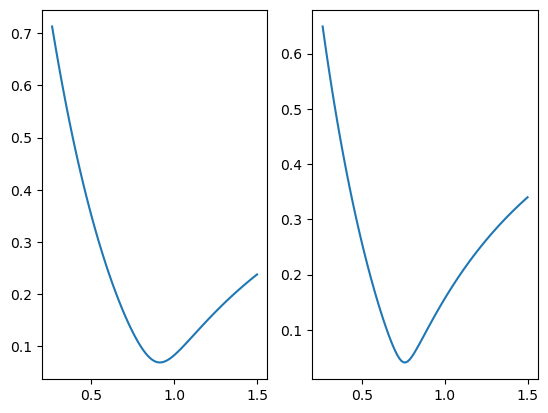

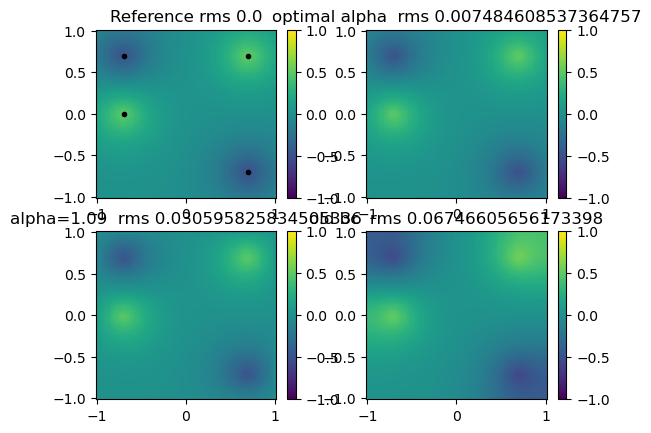

In [4]:
include(joinpath(exampledir, "DIVAnd_simple_example_bc2D.jl"))

### Check effect on $\mathtt{DIVAndgo}$

  5.569746 seconds (470.93 k allocations: 8.712 GiB, 5.62% gc time, 4.60% compilation time)


[ Info: Directory already exists
[ Info: Directory already exists
[ Info: number of windows: 1


 25.419957 seconds (39.18 M allocations: 31.135 GiB, 2.85% gc time, 47.05% compilation time)
((100,), (100,))size(residueGO)) = 
norm(residue - residueGO) = NaN


[ Info: Saved figure as ./figures/DIVAnd_simple_example_go_1.png


  4.819184 seconds (220.20 k allocations: 8.681 GiB, 6.72% gc time, 3.27% compilation time)


[ Info: number of windows: 1


 14.728798 seconds (4.18 M allocations: 29.474 GiB, 4.37% gc time, 18.78% compilation time)
((100,), (100,))size(residueGO)) = 
norm(residue - residueGO) = NaN


[ Info: Saved figure as ./figures/DIVAnd_simple_example_go_2.png
[ Info: Saved figure as ./figures/DIVAnd_simple_example_go_3.png


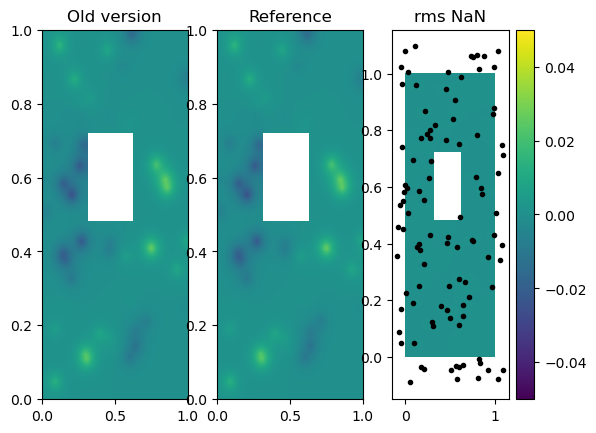

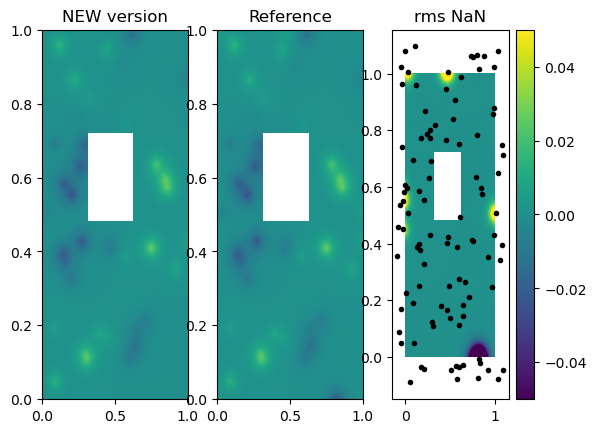

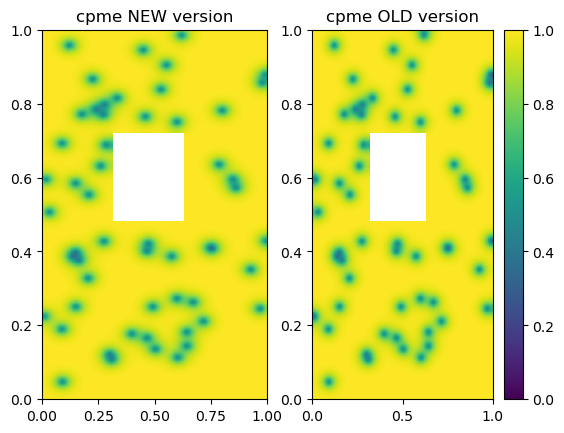

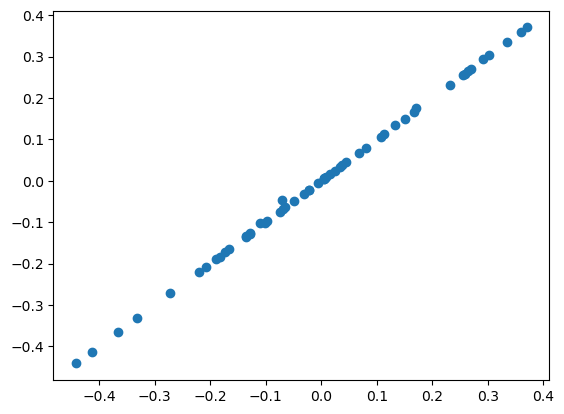

PyObject <matplotlib.collections.PathCollection object at 0x74e0aaec3740>

In [6]:
include(joinpath(exampledir, "DIVAnd_simple_example_go.jl"))

## Implementation

Implemented within $\mathtt{DIVAndrun}$ so that windowing can be done efficiently. In order to avoid copying a tuple, work at the level where the pmn's are actually used was preferred whenever possble? No, seems to be complicated ? The default value is $\alpha=1$. It always allows one to force use of unmodified metrics by using $\mathtt{alphabc=0}$ in the argument list or any other value for different choices of $\alpha$. Now implemented in $\mathtt{DIVAnd\_bc\_stretch}$ in which not only the metrics are stretched but also the grid coordinates, assuming locally proportionallity between $\delta x$ and $1/p_m$.